In [ ]:
import torch

In [ ]:
a = torch.tensor([1., 2., 3.])
b = torch.tensor([10., 20., 30.])
c= torch. tensor([100., 200., 300.])

In [ ]:
a.requires_grad
# requires_grad is a Boolean field for every tensor; Default it is set to False, i.e. tensor does not need the gradients

False

In [ ]:
(a+c).requires_grad
# result also does not need gradients, unless if there is at least one tensor that requires gradient

False

In [ ]:
c.requires_grad = True
# Enabling the tensor to compute gradients
c.requires_grad

True

In [ ]:
b.requires_grad_()
# default value set by this function is True

tensor([10., 20., 30.], requires_grad=True)

In [ ]:
(a+c).requires_grad

True

In [ ]:
# let's use autograd(o/p, i/p)
a.requires_grad = True
b.requires_grad = True
d = a.pow(2).sum() + b.log().sum()
torch.autograd.grad(d,(a,b))

(tensor([2., 4., 6.]), tensor([0.1000, 0.0500, 0.0333]))

In [ ]:
f = a.pow(2).sum() + b.log().sum()
g = a.pow(2).sum() + b.log().sum()
torch.autograd.grad([f,g],a,retain_graph=True)
# if o/p is a tuple, the result is the sum of the gradients of its elements.

(tensor([ 4.,  8., 12.]),)

In [ ]:
torch.autograd.grad([f,g],a)

(tensor([ 4.,  8., 12.]),)

Tensor.backward() accumulates the gradient of the leaf nodes in the graph. \\
Tensor.grad field will accumulate these gradients

In [ ]:
h = a.pow(2).sum() + b.log().sum()
print('before backpropagating')
print(a.grad)
print(b.grad)
h.backward()
print('after backpropagating')
print(a.grad)
print(b.grad)

before backpropagating
None
None
after backpropagating
tensor([2., 4., 6.])
tensor([0.1000, 0.0500, 0.0333])


In [ ]:
h.backward()
print('after backpropagating twice')
print(a.grad)
print(b.grad)

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [ ]:
h = a.pow(2).sum() + b.log().sum()
print('before backpropagating')
print(a.grad)
print(b.grad)
h.backward(retain_graph=True)
print('after backpropagating')
print(a.grad)
print(b.grad)
h.backward(retain_graph=True)
print('after backpropagating second time')
print(a.grad)
print(b.grad)

before backpropagating
tensor([2., 4., 6.])
tensor([0.1000, 0.0500, 0.0333])
after backpropagating
tensor([ 4.,  8., 12.])
tensor([0.2000, 0.1000, 0.0667])
after backpropagating second time
tensor([ 6., 12., 18.])
tensor([0.3000, 0.1500, 0.1000])


In [ ]:
# Higher order derivatives
# Gradients are also represented as tensors!
# Gradient computation is not included as part of the graph by default.
# The create_graph argument includes gradient computation as part of the graph,
# allowing  computation of higher order derivatives.
print(a)
h = a.pow(2).sum() + b.log().sum()
print(h)
first_derivative = torch.autograd.grad(h, a, create_graph=True)[0]
# We now have dloss/dx
second_derivative = torch.autograd.grad(first_derivative.mean(), a)[0]

print(first_derivative)
print(second_derivative)

# Note that using .backward() for higher order derivatives is discouraged because the .grad field becomes hard to reason about.
# In theory, derivatives of any order can be computed in this way

tensor([1., 2., 3.], requires_grad=True)
tensor(22.6995, grad_fn=<AddBackward0>)
tensor([2., 4., 6.], grad_fn=<MulBackward0>)
tensor([0.6667, 0.6667, 0.6667])


In [ ]:
# sample module that uses autograd and GD
a = torch.tensor( 1.0).requires_grad_()
b = torch.tensor(-1.).requires_grad_()
eta = 0.1
for k in range(20):
  l = (a - 1.0)**2 + (b + 1.0)**2 + (a - b)**2
  ga, gb = torch.autograd.grad(l, (a, b)) # ga = 2(a-1) + 2(a-b), gb = 2(b + 1) - 2(a - b)
  with torch.no_grad():
    a -= eta * ga
    b -= eta * gb
  print('iteration %d: loss = %.4f \t a = %.3f \t b = %.3f, '%(k,l.item(),a.item(), b.item()))

iteration 0: loss = 4.0000 	 a = 0.200 	 b = -0.200, 
iteration 1: loss = 1.4400 	 a = 0.360 	 b = -0.360, 
iteration 2: loss = 1.3376 	 a = 0.328 	 b = -0.328, 
iteration 3: loss = 1.3335 	 a = 0.334 	 b = -0.334, 
iteration 4: loss = 1.3333 	 a = 0.333 	 b = -0.333, 
iteration 5: loss = 1.3333 	 a = 0.333 	 b = -0.333, 
iteration 6: loss = 1.3333 	 a = 0.333 	 b = -0.333, 
iteration 7: loss = 1.3333 	 a = 0.333 	 b = -0.333, 
iteration 8: loss = 1.3333 	 a = 0.333 	 b = -0.333, 
iteration 9: loss = 1.3333 	 a = 0.333 	 b = -0.333, 
iteration 10: loss = 1.3333 	 a = 0.333 	 b = -0.333, 
iteration 11: loss = 1.3333 	 a = 0.333 	 b = -0.333, 
iteration 12: loss = 1.3333 	 a = 0.333 	 b = -0.333, 
iteration 13: loss = 1.3333 	 a = 0.333 	 b = -0.333, 
iteration 14: loss = 1.3333 	 a = 0.333 	 b = -0.333, 
iteration 15: loss = 1.3333 	 a = 0.333 	 b = -0.333, 
iteration 16: loss = 1.3333 	 a = 0.333 	 b = -0.333, 
iteration 17: loss = 1.3333 	 a = 0.333 	 b = -0.333, 
iteration 18: loss =

**Putting it all together** \\
Let's train an MLP on MNIST dataset

In [ ]:
# Import the necessary
from torchvision import datasets
import torchvision.transforms as transforms

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# number of subprocesses to use for data loading
num_workers = 1

# how many samples per batch to load
batch_size = 50

# percentage of training set to use as validation
valid_size = 0.2

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and testing datasets
train_data = datasets.MNIST(root = 'data', train = True, download = True, transform = transform)
test_data = datasets.MNIST(root = 'data', train = False, download = True, transform = transform)

# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_index, valid_index = indices[split:], indices[:split]

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, num_workers = num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, sampler = torch.utils.data.SubsetRandomSampler(valid_index), num_workers = num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, num_workers = num_workers)

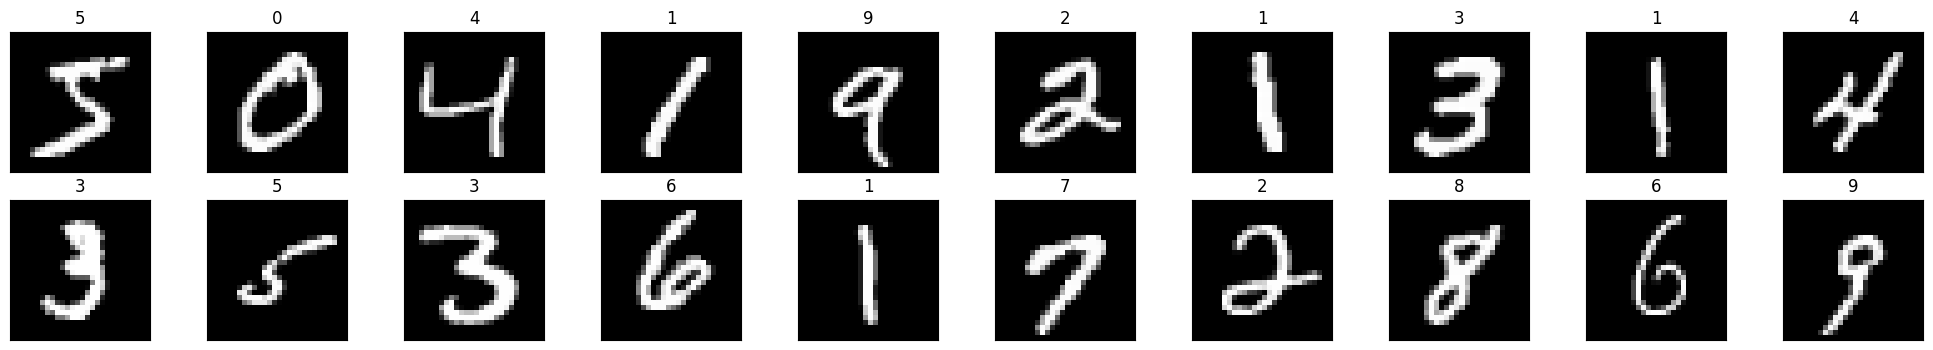

In [ ]:
#visualize data

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20//2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

In [ ]:
# define the model (MLP) architecture
import torch.nn as nn
import torch.nn.functional as F

# define NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()

        # linear layer (784 -> n_hidden1)
        self.fc1 = nn.Linear(28*28, 512)

        # linear layer (n_hidden1 -> n_hidden)
        self.fc2 = nn.Linear(512,512)

        # linear layer (n_hidden -> 10)
        self.fc3 = nn.Linear(512,10)


    def forward(self,x):
        # flatten image input
        x = x.view(-1,28*28)

        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))

        # add hidden layer, with relu activation function
        x = F.relu(self.fc2(x))

        # add output layer
        x = self.fc3(x)
        return x


# initialize the NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)


In [ ]:
# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent) and learning rate = 0.01
optimizer = torch.optim.SGD(model.parameters(),lr = 0.01)

In [ ]:
from tqdm import tqdm

# number of epochs to train the model
n_epochs = 10

# initialize tracker for minimum validation loss
valid_loss_min = np.Inf
# set initial "min" to infinity

for epoch in range(n_epochs):
    # monitor losses
    train_loss = 0
    valid_loss = 0

    ###################
    # training the model #
    ###################
    model.train() # prep model for training

    for data,label in tqdm(train_loader): # (0.8*50000)/50
        # clear the gradients of all the variables
        optimizer.zero_grad()

        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)

        # calculate the loss
        loss = criterion(output,label)

        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()

        # perform a single optimization step (parameter update)
        optimizer.step()

        # update running training loss
        train_loss += loss.item()* data.size(0)


    ######################
    # validate the model #
    ######################
    model.eval()  # prep model for evaluation

    for data,label in tqdm(valid_loader): # (0.2*50000)/50

        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)

        # calculate the loss
        loss = criterion(output,label)

        # update running validation loss
        valid_loss += loss.item() * data.size(0)

    # print training/validation statistics
    # calculate average loss over an epoch
    train_loss = train_loss / len(train_loader.sampler)
    valid_loss = valid_loss / len(valid_loader.sampler)

    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch+1,
        train_loss,
        valid_loss
        ))

    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model.pt')
        valid_loss_min = valid_loss

100%|██████████| 240/240 [00:02<00:00, 91.20it/s]


Epoch: 1 	Training Loss: 1.334261 	Validation Loss: 0.532214
Validation loss decreased (inf --> 0.532214).  Saving model ...


100%|██████████| 240/240 [00:02<00:00, 80.17it/s]


Epoch: 2 	Training Loss: 0.426228 	Validation Loss: 0.368570
Validation loss decreased (0.532214 --> 0.368570).  Saving model ...


100%|██████████| 240/240 [00:02<00:00, 89.03it/s]


Epoch: 3 	Training Loss: 0.338364 	Validation Loss: 0.320906
Validation loss decreased (0.368570 --> 0.320906).  Saving model ...


100%|██████████| 240/240 [00:03<00:00, 72.56it/s]


Epoch: 4 	Training Loss: 0.300655 	Validation Loss: 0.291505
Validation loss decreased (0.320906 --> 0.291505).  Saving model ...


100%|██████████| 240/240 [00:02<00:00, 92.40it/s]


Epoch: 5 	Training Loss: 0.274015 	Validation Loss: 0.268066
Validation loss decreased (0.291505 --> 0.268066).  Saving model ...


100%|██████████| 240/240 [00:02<00:00, 83.90it/s]


Epoch: 6 	Training Loss: 0.251843 	Validation Loss: 0.247823
Validation loss decreased (0.268066 --> 0.247823).  Saving model ...


100%|██████████| 240/240 [00:02<00:00, 90.50it/s]


Epoch: 7 	Training Loss: 0.232367 	Validation Loss: 0.229660
Validation loss decreased (0.247823 --> 0.229660).  Saving model ...


100%|██████████| 240/240 [00:02<00:00, 88.93it/s]


Epoch: 8 	Training Loss: 0.214970 	Validation Loss: 0.213126
Validation loss decreased (0.229660 --> 0.213126).  Saving model ...


100%|██████████| 240/240 [00:02<00:00, 89.24it/s]


Epoch: 9 	Training Loss: 0.199485 	Validation Loss: 0.198234
Validation loss decreased (0.213126 --> 0.198234).  Saving model ...


100%|██████████| 240/240 [00:02<00:00, 88.74it/s]

Epoch: 10 	Training Loss: 0.185623 	Validation Loss: 0.184850
Validation loss decreased (0.198234 --> 0.184850).  Saving model ...


In [ ]:
    ##################
    # test the model #
    ##################

# Load the best model
model.load_state_dict(torch.load('model.pt'))
model.eval()  # Set the model to evaluation mode

# Initialize variables to track test loss and accuracy
test_loss = 0.0
correct = 0
total = 0

# Testing the model
for data, labels in test_loader:
  output = model(data)

  loss = criterion(output, labels)
  test_loss += loss.item() * data.size(0)

  _, preds = torch.max(output, 1)
  # Update correct predictions count
  correct += (preds == labels).sum().item()
  total += labels.size(0)

# Calculate average loss and accuracy
test_loss = test_loss / total
accuracy = correct / total * 100

# Print test results
print(f'Test Loss: {test_loss:.6f}')
print(f'Test Accuracy: {accuracy:.2f}%')


<ipython-input-29-2657b84a447a>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model.pt'))


Test Loss: 0.180386
Test Accuracy: 94.83%


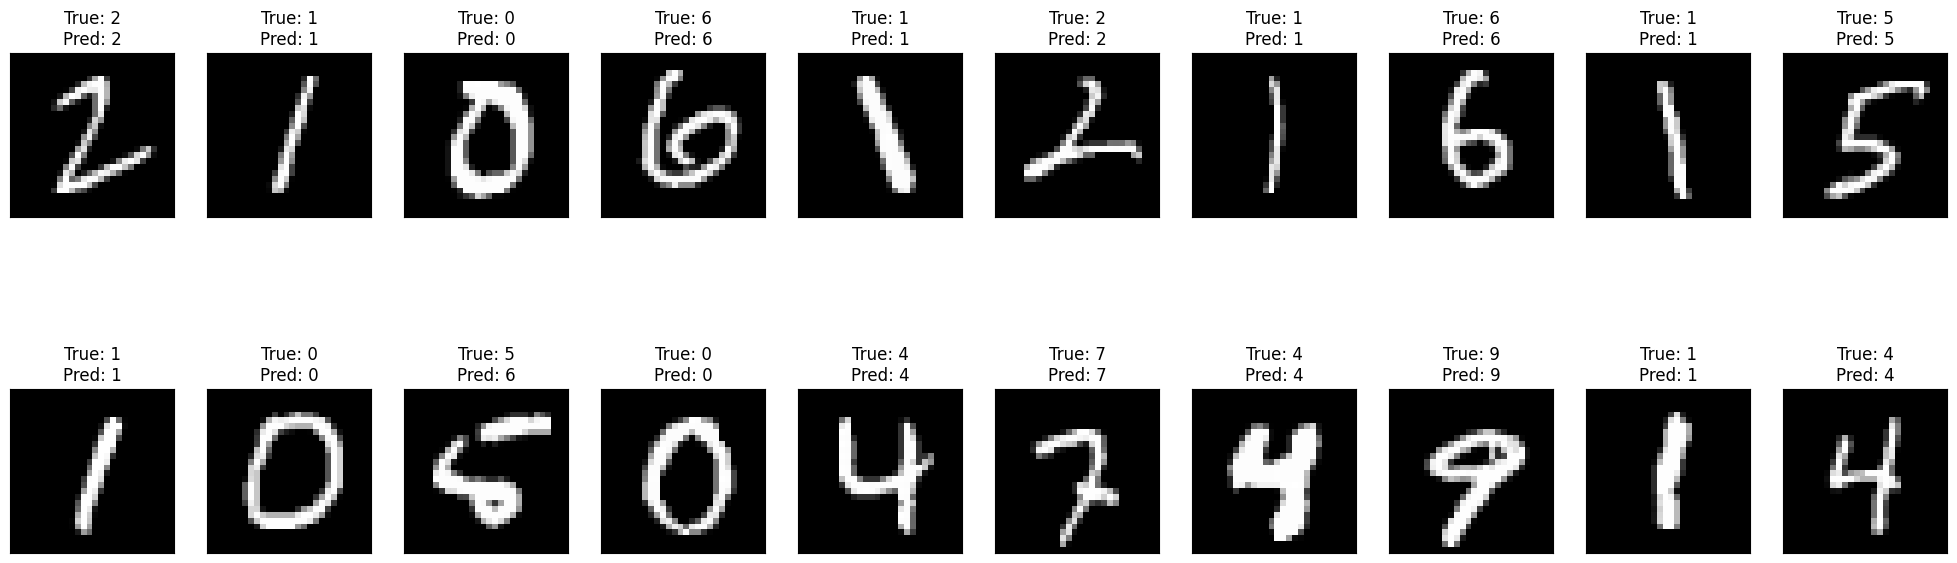

In [ ]:
import random

# Get one batch of test data
dataiter = iter(test_loader)
images, labels = next(dataiter)

random_indices = random.sample(range(len(images)), 20)

fig = plt.figure(figsize=(25, 8))
for idx, random_idx in enumerate(random_indices):
    ax = fig.add_subplot(2, 10, idx + 1, xticks=[], yticks=[])
    img = images[random_idx].numpy().squeeze()  # Convert to NumPy and squeeze dimensions
    ax.imshow(img, cmap='gray')

    # Get the true label and predicted label
    true_label = labels[random_idx].item()
    output = model(images[random_idx].unsqueeze(0))  # Add batch dimension for prediction
    _, predicted_label = torch.max(output, 1)

    ax.set_title(f"True: {true_label}\nPred: {predicted_label.item()}")
